
# Dominando gráficos en Python con Matplotlib y Seaborn

Matplotlib y Seaborn son las bibliotecas más utilizadas en Python para la visualización de datos. Si no conoces las funciones que ofrecen estas bibliotecas pues este tutorial es para tí.

Este artículo te guiará en los principales gráficos para realizar un buen análisis visual de presentación de resultados.


### CARGAMOS LAS LIBRERIAS NECESARIAS

In [1]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
from matplotlib import animation
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 4)
plt.style.use('ggplot')

In [2]:
# Creando conexión con google drive
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


### CARGA DE DATOS Y DIMENSIONAMIENTO

In [3]:
#Cargando el dataset
data = pd.read_csv('/gdrive/MyDrive/05. Cursos dictados/Capacitacipn Juanca - DESARROLLOS/06. Sesión 06/datos/Mall_Customers.csv', sep=',',encoding = "ISO-8859-1")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### GRAFICOS MAS UTILIZADOS

- Gráfico de barras
- Gráfico de histograma
- Gráfico de densidades
- Gráfico Pie
- Gráfico de correlación
- Grafico de calor
- Gráfico de cajas y bigotes
- Gráfico Waterfall
- Gráfico Paretto

### Gráfico de barras:

Para crear los gráficos de barras se ocupa el método bar() la cual cuenta con los siguientes parámetros de entrada:

x: Es una secuencia de valores que se mostraran en el eje horizontal o eje x.

height: Es la altura que van a tener la barras, son un conjunto de valores numéricos.

width: Este parámetro es opcional puede ser una constante o una lista y sirve para controlar el ancho que van a tener las barras, el valor por defecto es de 0.8

bottom: Este valor sirve para indicar a partir de que punto en el eje y van a comenzar las barras, puede ser una lista o una constante, el valor por defecto es de 0 y suele ser ocupado cuando se hacen gráficas de barras apiladas

align: Es un valor opcional que puede tomar los valores {'center', 'edge'} según se decida alinear el texto del eje x al centro o a la izquierda de la barra, el valor por defecto es center.

color: Puede ser una constante o una lista sirve para indicar el color que van a tener la barras, el color puede ser el nombre del color en ingles o el valor hexadecimal del color.

In [ ]:
# Creamos las variables a incorporar en el gráfico
x_values = data.Gender.unique()
y_values = data.Gender.value_counts().tolist()

In [ ]:
x_values, y_values

(array(['Male', 'Female'], dtype=object), [112, 88])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


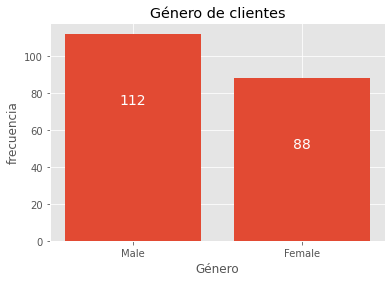

In [ ]:
# Agregamos datos adicionales al gráfico
plt.bar(x_values, y_values)
plt.title('Género de clientes')
ax = plt.subplot()  # Axis
ax.set_xlabel('Género')
ax.set_ylabel('frecuencia')
#for x,y in enumerate(y_values):
#    plt.text(x, y-38, '%s' %round(y,1), ha='center',fontsize=14,color = 'green',bbox=dict(facecolor='white', alpha=0.5))
for x,y in enumerate(y_values):
    plt.text(x, y-38, '%s' %round(y,1), ha='center',fontsize=14,color = 'white')
plt.show()

### Gráfico histograma y densidades:

- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

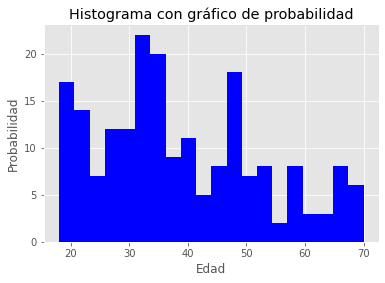

In [ ]:
n, bins, patches=plt.hist(data.Age,
                          bins=20,
                          density=False, 
                          color = 'blue')
plt.xlabel("Edad")
plt.ylabel("Probabilidad")
plt.title("Histograma con gráfico de probabilidad")
plt.show()

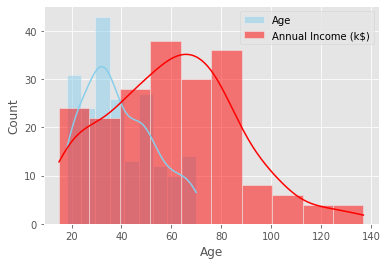

In [ ]:
# libraries & dataset
import seaborn as sns
import matplotlib.pyplot as plt
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
#sns.set(style="darkgrid")
#df = sns.load_dataset("iris")

sns.histplot(data=data, x='Age', color="skyblue", label='Age', kde=True)
sns.histplot(data=data, x='Annual Income (k$)', color="red", label='Annual Income (k$)', kde=True)

plt.legend() 
plt.show()

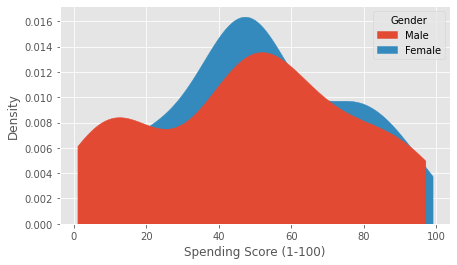

In [ ]:
# set seaborn whitegrid theme
#sns.set(style="whitegrid")

# Without transparency
sns.kdeplot(data=data, x="Spending Score (1-100)", hue="Gender", cut=0, fill=True, common_norm=False, alpha=1)
plt.show()

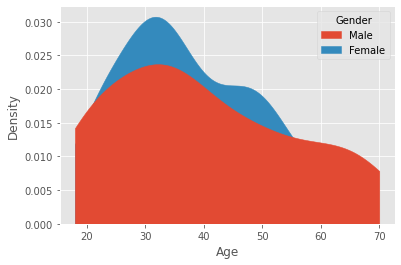

In [ ]:
# Without transparency
sns.kdeplot(data=data, x="Age", hue="Gender", cut=0, fill=True, common_norm=False, alpha=1)
plt.show()

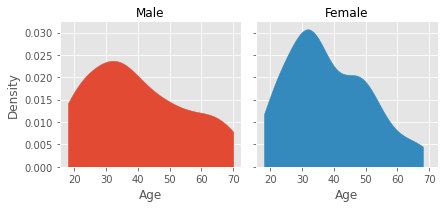

In [ ]:
# set seaborn whitegrid theme
#sns.set(style="whitegrid")

# using small multiple
# create a grid 
g = sns.FacetGrid(data, col='Gender', hue='Gender', col_wrap=3)

# draw density plots
g = g.map(sns.kdeplot,"Age", cut=0, fill=True, common_norm=False, alpha=1, legend=False)

# control the title of each facet
g = g.set_titles("{col_name}")

# show the graph
plt.show()

###  Gráfico de pie

Ahora crearemos una variable adicional de edad agrupada para realizar mayor análisis gráfico

- https://aprendeia.com/agrupando-los-datos-con-python/

In [4]:
bins = [0, 24, 30, 40, 50, 60, 100] # Definimos rangos de corte para generar la variable edad en rangos
names = ["[hasta 24]", "[25-30]", "[31-40]", "[41-50]", "[51-60]", "[60 a más]"] # Definimos las etiquetas
data["range_age"] = pd.cut(data["Age"], bins, labels = names)
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),range_age
0,1,Male,19,15,39,[hasta 24]
1,2,Male,21,15,81,[hasta 24]
2,3,Female,20,16,6,[hasta 24]
3,4,Female,23,16,77,[hasta 24]
4,5,Female,31,17,40,[31-40]


In [ ]:
# Creamos las variables a incorporar en el gráfico
x_values_2 = data.range_age.unique()
y_values_2 = data.range_age.value_counts().tolist()

In [ ]:
# Corremos una función para mostrar los porcentajes de la variable range_edad
import numpy as np
sizes = np.array(y_values_2)

def absolute_value(val):
    a  = np.round(val/100.*sizes.sum(), 0)
    return a

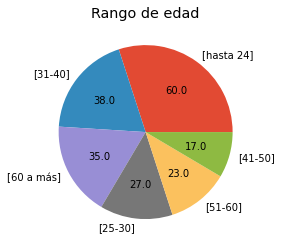

In [ ]:
# Agregamos datos adicionales al gráfico
# plt.pie(y_values_2, labels= x_values_2,autopct='%1.1f%%')
plt.pie(y_values_2, labels= x_values_2,autopct=absolute_value)
plt.title('Rango de edad')

plt.show()
plt.close('all')

Gráfico de barras con colores

In [ ]:
colors = ['#FF0000','#169b62','#008c45','#aa151b','#002868','teal']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


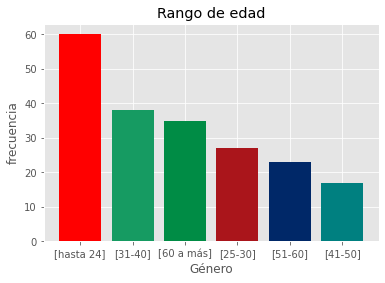

In [ ]:
plt.bar(x_values_2, y_values_2, color = colors)
plt.title('Rango de edad')
ax = plt.subplot()  # Axis
ax.set_xlabel('Género')
ax.set_ylabel('frecuencia')
plt.show()
plt.close('all')

###  Gráfico de correlación

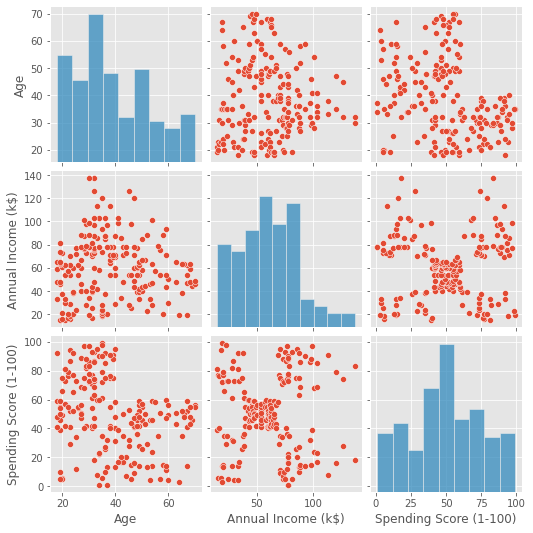

In [ ]:
# with regression
df_graf = data[["Age","Annual Income (k$)","Spending Score (1-100)"]]

# without regression
sns.pairplot(df_graf, kind="scatter")
plt.show()

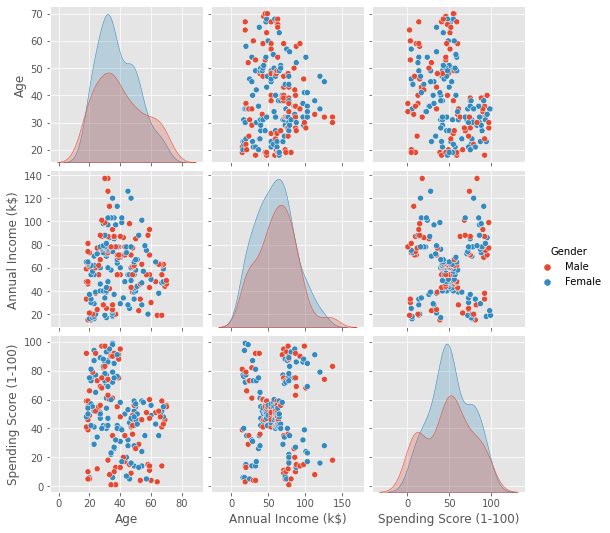

In [ ]:
# with regression
df_graf = data[["Age","Annual Income (k$)","Spending Score (1-100)","Gender"]]

sns.pairplot(df_graf, hue = 'Gender')
plt.show()
 

###  Gráfico de calor:

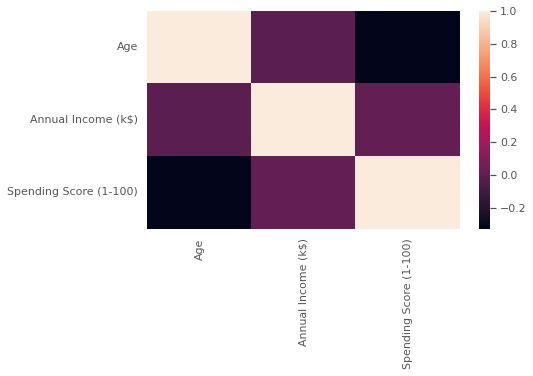

In [ ]:
sns.heatmap(data[['Age', 'Annual Income (k$)','Spending Score (1-100)']].corr())
plt.show()

###  Gráfico de cajas:

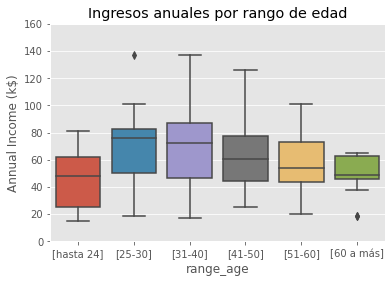

In [5]:
sns.boxplot(x='range_age', y='Annual Income (k$)', data=data)
plt.title('Ingresos anuales por rango de edad')
plt.ylim(0,160)
plt.show()

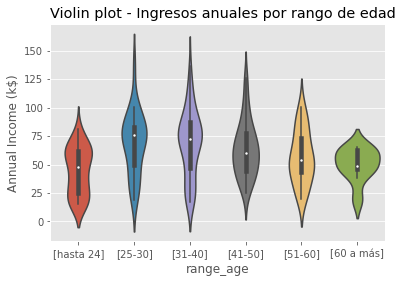

In [7]:
# plot violin chart
sns.violinplot(x='range_age', y='Annual Income (k$)', data=data)
plt.title("Violin plot - Ingresos anuales por rango de edad", loc="left")
plt.show()

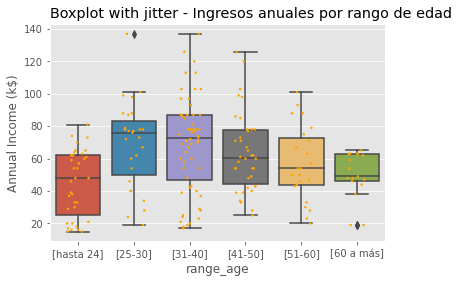

In [8]:
# boxplot
ax = sns.boxplot(x='range_age', y='Annual Income (k$)', data=data)
# add stripplot
ax = sns.stripplot(x='range_age', y='Annual Income (k$)', data=data, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter - Ingresos anuales por rango de edad", loc="left")
plt.show()

###  Gráfico Waterfall:

In [9]:
brent = pd.DataFrame({'price':[63.8, 55.7, 32.5, 18.4, 29.4, 40.3,
                               43.2, 44.7, 40.9, 40.2, 42.7, 50]}, 
                      index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 
                             'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
                             'Nov', 'Dec'])
print(brent.head(12))

     price
Jan   63.8
Feb   55.7
Mar   32.5
Apr   18.4
May   29.4
Jun   40.3
Jul   43.2
Aug   44.7
Sep   40.9
Oct   40.2
Nov   42.7
Dec   50.0


In [11]:
# Creamos las variaciones de precio por cada mes
deltas = [brent['price'][i] if i==0 else brent['price'][i]-brent['price'][i-1] for i in range(len(brent))]
brent['delta'] = deltas
print(brent)

     price  delta
Jan   63.8   63.8
Feb   55.7   -8.1
Mar   32.5  -23.2
Apr   18.4  -14.1
May   29.4   11.0
Jun   40.3   10.9
Jul   43.2    2.9
Aug   44.7    1.5
Sep   40.9   -3.8
Oct   40.2   -0.7
Nov   42.7    2.5
Dec   50.0    7.3


In [12]:
pip install waterfallcharts

  Created wheel for waterfallcharts: filename=waterfallcharts-3.8-py3-none-any.whl size=3413 sha256=cd0095d6a1007f1a1a93bfd0a7cda326b035dd8d77470614e1ce203ff77b6258
  Stored in directory: /root/.cache/pip/wheels/4a/b2/85/9b6eda27fab2effa580c6942fb094e8536cc46e8741ec5f586
Successfully built waterfallcharts


Text(0.5, 1.0, 'Precios por mes')

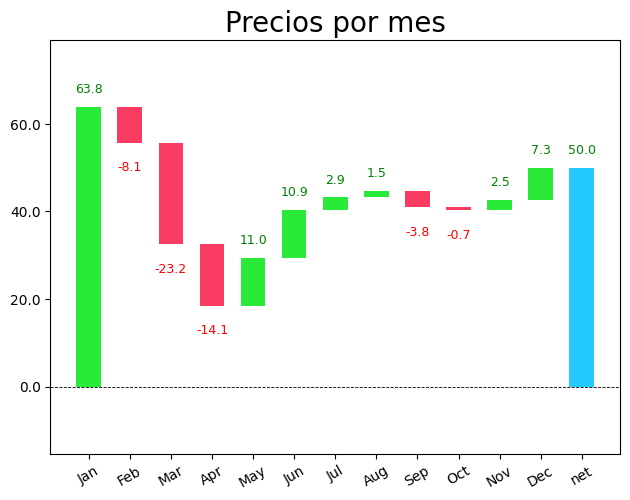

In [13]:
import waterfall_chart

plt.rcParams["figure.figsize"] = (10,6)

plt.style.use('default')
waterfall_chart.plot(brent.index, brent.delta)
plt.title('Precios por mes', fontsize=20)

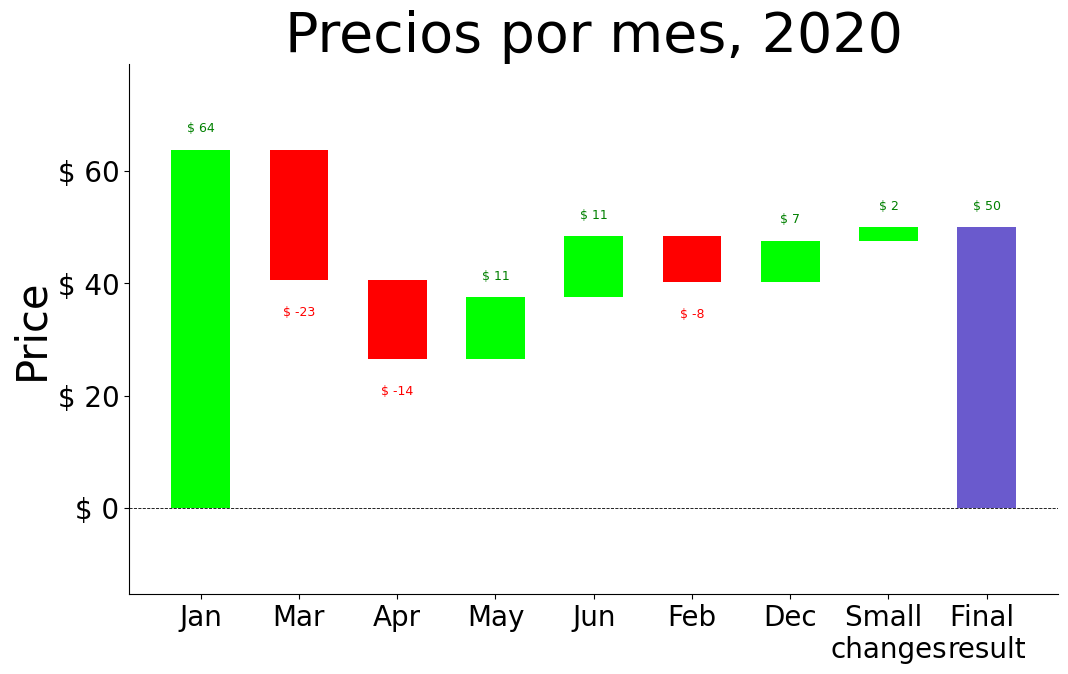

In [17]:
plt.rcParams["figure.figsize"] = (10,6)
waterfall_chart.plot(brent.index, brent['delta'], 
                     rotation_value=0, 
                     sorted_value=True,
                     threshold=0.1, 
                     formatting="$ {:,.0f}",
                     net_label='Final \nresult',
                     other_label='Small \nchanges',
                     blue_color='slateblue', 
                     green_color='lime', red_color='red')
plt.title('Precios por mes, 2020', fontsize=40)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Price', fontsize=30)
sns.despine()
plt.show()

###  Gráfico de Paretto:

In [18]:
# Crear datos, ventas de 10 categorías de productos
data = pd.Series(np.random.randn(10)*1200+3000,
                index = list('ABCDEFGHIJ'))
print(data)

A    1754.805491
B    2502.595568
C    1558.022110
D    2562.902849
E    3235.203842
F    1815.883341
G    4794.203541
H    1928.819702
I    3767.847550
J      19.268132
dtype: float64


Text(0, 0.5, 'Ingresos')

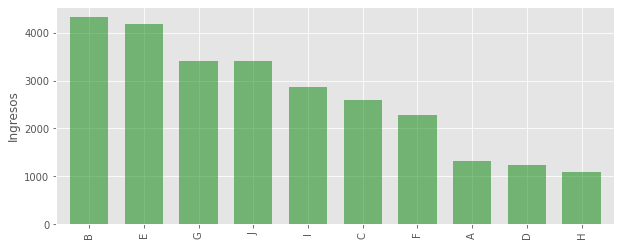

In [ ]:
  # Organizar de mayor a menor
  data.sort_values(ascending=False, inplace= True)

  # Crea un gráfico de barras de ingresos
  plt.figure(figsize = (10,4))
  data.plot(kind = 'bar', color = 'g', alpha = 0.5, width = 0.7)  
  plt.ylabel('Ingresos')

In [20]:
# Encuentre el índice cuando la proporción acumulada exceda el 80%
# Encuentra la posición del índice correspondiente a la clave

p = data.cumsum()/data.sum()  # Crea una proporción acumulativa, Serie
key = p[p>0.8].index[0]  
key_num = data.index.tolist().index(key) 
print('El índice del valor del nodo que supera el 80% de la proporción acumulada es:' ,key)
print('La posición del índice del valor del nodo que excede el 80% de la proporción acumulada es:' ,key_num)
print('------')


El índice del valor del nodo que supera el 80% de la proporción acumulada es: H
La posición del índice del valor del nodo que excede el 80% de la proporción acumulada es: 7
------


Text(0, 0.5, 'Revenue_Ratio')

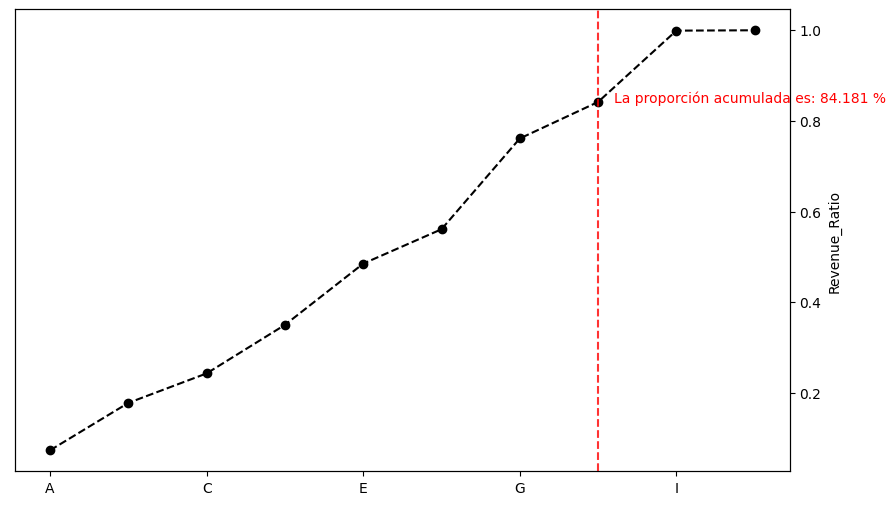

In [21]:
# Dibuje la curva de participación de ingresos acumulada
p.plot(style = '--ko', secondary_y=True)  # secundario_y → eje coordenado secundario y
plt.axvline(key_num,color='r',linestyle="--",alpha=0.8)  
plt.text(key_num+0.2,p[key],'La proporción acumulada es:% .3f %%' % (p[key]*100), color = 'r')  # Nodos con una proporción acumulada de más del 80%
plt.ylabel('Revenue_Ratio')


In [ ]:
# Salida del producto factor decisivo
key_product = data.loc[:key]
print('El producto principal es:')
print(key_product)


El producto principal es:
I    4465.644777
B    4336.208928
D    3364.911491
G    3074.766357
dtype: float64


A    1422.263582
B    -290.406054
C    2019.146722
D    1103.839567
E    1992.531560
F    4201.063293
G    5106.249637
H    1645.625472
I    3681.863914
J    5895.101918
dtype: float64
------
El índice del valor del nodo que supera el 80% de la proporción acumulada es: E
La posición del índice del valor del nodo que excede el 80% de la proporción acumulada es: 5
------
El producto principal es:
J    5895.101918
G    5106.249637
F    4201.063293
I    3681.863914
C    2019.146722
E    1992.531560
dtype: float64


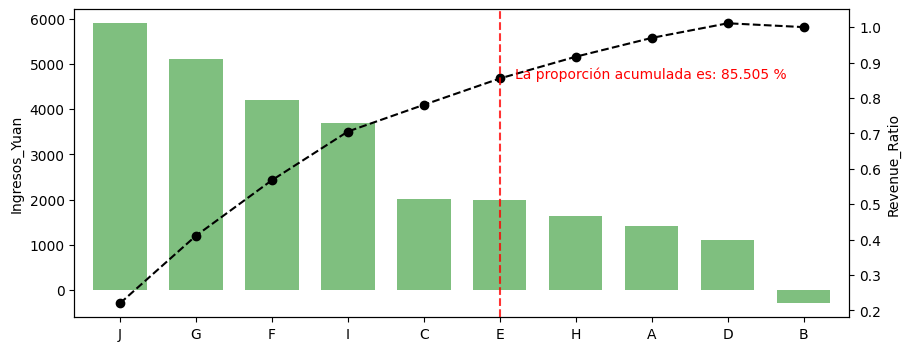

In [22]:
# Análisis de distribución de Pareto 

data = pd.Series(np.random.randn(10)*1200+3000,
                index = list('ABCDEFGHIJ'))
print(data)
print('------')
# Crear datos, ventas de 10 categorías de productos

data.sort_values(ascending=False, inplace= True)
# Organizar de mayor a menor

plt.figure(figsize = (10,4))
data.plot(kind = 'bar', color = 'g', alpha = 0.5, width = 0.7)  
plt.ylabel('Ingresos_Yuan')
# Crea un gráfico de barras de ingresos

p = data.cumsum()/data.sum()  # Crea una proporción acumulativa, Serie
key = p[p>0.8].index[0]  
key_num = data.index.tolist().index(key) 
print('El índice del valor del nodo que supera el 80% de la proporción acumulada es:' ,key)
print('La posición del índice del valor del nodo que excede el 80% de la proporción acumulada es:' ,key_num)
print('------')
# Encuentre el índice cuando la proporción acumulada exceda el 80%
# Encuentra la posición del índice correspondiente a la clave

p.plot(style = '--ko', secondary_y=True)  # secundario_y → eje coordenado secundario y
plt.axvline(key_num,color='r',linestyle="--",alpha=0.8)  
plt.text(key_num+0.2,p[key],'La proporción acumulada es:% .3f %%' % (p[key]*100), color = 'r')  # Nodos con una proporción acumulada de más del 80%
plt.ylabel('Revenue_Ratio')
# Dibuje la curva de participación de ingresos acumulada

key_product = data.loc[:key]
print('El producto principal es:')
print(key_product)
# Salida del producto factor decisivo

###  Bibliografía


- https://towardsdatascience.com/understanding-matplotlib-in-6-code-snippets-63e5b8be2c8
- https://medium.com/ironhack/data-visualization-con-pandas-y-matplotlib-7f1358be6764
- https://matplotlib.org/3.1.0/gallery/style_sheets/style_sheets_reference.html

- https://www.python-graph-gallery.com/